### Load the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets

### Define the aux functions

In [2]:
# Remove spaces from a string
def removeSpaces(value):
    aux = ''
    for i in value:
        if i != ' ':
            aux += i
    return aux

# Convert a string triple tuple to a list
def stringTupleToList(value):
    for i in range(1,len(value)):
        if value[i] == ',':
            entidade = value[1:i]
            aux = value[i+1:]
            break
    for i in range(len(aux)-2,0,-1):
        if aux[i] == ',':
            contador = int(aux[i+1:-1])
            aux = aux[:i]
            break
    adjetivos = aux[1:-1].split(',') if len(aux[1:-1]) != 0 else []

    return [removeSpaces(entidade.lower()),adjetivos,contador]

# Convert a string due tuple to an integer
def stringTuple2ToList(value):
    for i in range(1,len(value)):
        if value[i] == ',':
            entidade = value[1:i]
            aux = value[i+1:-1]
            break
    return(int(aux))

### Loading the NLP results

In [3]:
path = "../../../Results_Examples/NLP_Results_Example/"

dados = []
try:
    i = 1
    while(True):
        with open(path+str(i), 'r') as archive:
            lines = archive.readlines()
            for line in lines:
                # (Entidade,[Adjetivos],Contador)\n
                dados.append(stringTupleToList(line.replace('\n','')))
        i += 1
except Exception as e:
    # Do nothing
    print("End of archive")

x = pd.DataFrame(dados, columns=['Entity','Adjectives', 'Counter'])

End of archive


### Grouping by entity, suming Counter and joining Adjectives

In [4]:
# Entity mentions number
ent_mentions = pd.DataFrame(x.groupby('Entity')['Counter'].sum()).sort_values(by='Counter',ascending=False).drop(['LangNotDefined'.lower(),'NotInEnglish'.lower()])
# Entity and its adjectives
ent_adjectives = pd.DataFrame(x.groupby('Entity')['Adjectives'].sum())

### Defining an another set with only adjectives

In [5]:
aux = []
for i in ent_adjectives.Adjectives:
    if len(i) != 0:
        for j in i:
            aux.append([removeSpaces(j.lower()),1])
adj = pd.DataFrame(aux, columns=['Adjective', 'Counter'])
adj = pd.DataFrame(adj.groupby('Adjective')['Counter'].sum()).sort_values(by='Counter',ascending=False).drop(['american','russian','sh','unmanag'])

### The most spoken words: Entity and Adjective

Text(0.5, 1.0, 'Adjective')

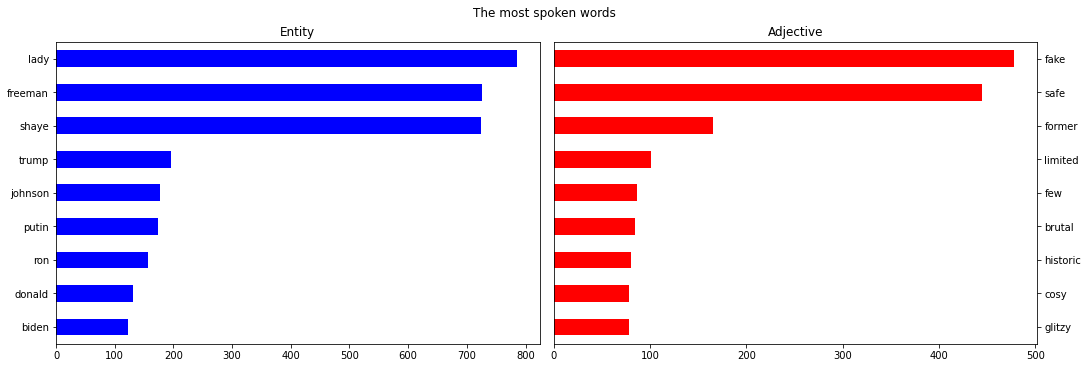

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2,constrained_layout=True,figsize=(15, 5))
                
fig.suptitle('The most spoken words')

ent_mentions[9:0:-1].plot.barh(ax=ax1, color = 'blue')
adj[9:0:-1].plot.barh(ax=ax2, color = 'red')

leg = plt.legend()
ax1.get_legend().remove()
ax2.get_legend().remove()
ax2.yaxis.tick_right()
ax1.set_ylabel('')
ax2.set_ylabel('')
ax1.set_title("Entity")
ax2.set_title("Adjective")

In [7]:
adj_4 = []

aux = []
for i in ent_adjectives.loc['zelensky'].Adjectives:
    aux.append([removeSpaces(i.lower()),1])
adj_zelensky = pd.DataFrame(aux, columns=['Adjective', 'Counter'])
adj_zelensky = pd.DataFrame(adj_zelensky.groupby('Adjective')['Counter'].sum()).sort_values(by='Counter',ascending=False)
adj_zelensky.drop(['virtual','extra','next','such','european','sure','big','new','other','american','own','proba'],inplace=True)

aux = []
for i in ent_adjectives.loc['trump'].Adjectives:
    aux.append([removeSpaces(i.lower()),1])
adj_trump = pd.DataFrame(aux, columns=['Adjective', 'Counter'])
adj_trump = pd.DataFrame(adj_trump.groupby('Adjective')['Counter'].sum()).sort_values(by='Counter',ascending=False)
adj_trump.drop(['whole','th','new','constant','american','russian'],inplace=True)

aux = []
for i in ent_adjectives.loc['putin'].Adjectives:
    aux.append([removeSpaces(i.lower()),1])
adj_putin = pd.DataFrame(aux, columns=['Adjective', 'Counter'])
adj_putin = pd.DataFrame(adj_putin.groupby('Adjective')['Counter'].sum()).sort_values(by='Counter',ascending=False)
adj_putin.drop(['high','new','american','russian','former','whole','same','full','fourth','big','many','european','old','other','able','german'],inplace=True)

aux = []
for i in ent_adjectives.loc['biden'].Adjectives:
    aux.append([removeSpaces(i.lower()),1])
adj_biden = pd.DataFrame(aux, columns=['Adjective', 'Counter'])
adj_biden = pd.DataFrame(adj_biden.groupby('Adjective')['Counter'].sum()).sort_values(by='Counter',ascending=False)
adj_biden.drop(['high','american','russian','small','longtime','last','own'],inplace=True)

adj_4.append(adj_zelensky)
adj_4.append(adj_trump)
adj_4.append(adj_putin)
adj_4.append(adj_biden)

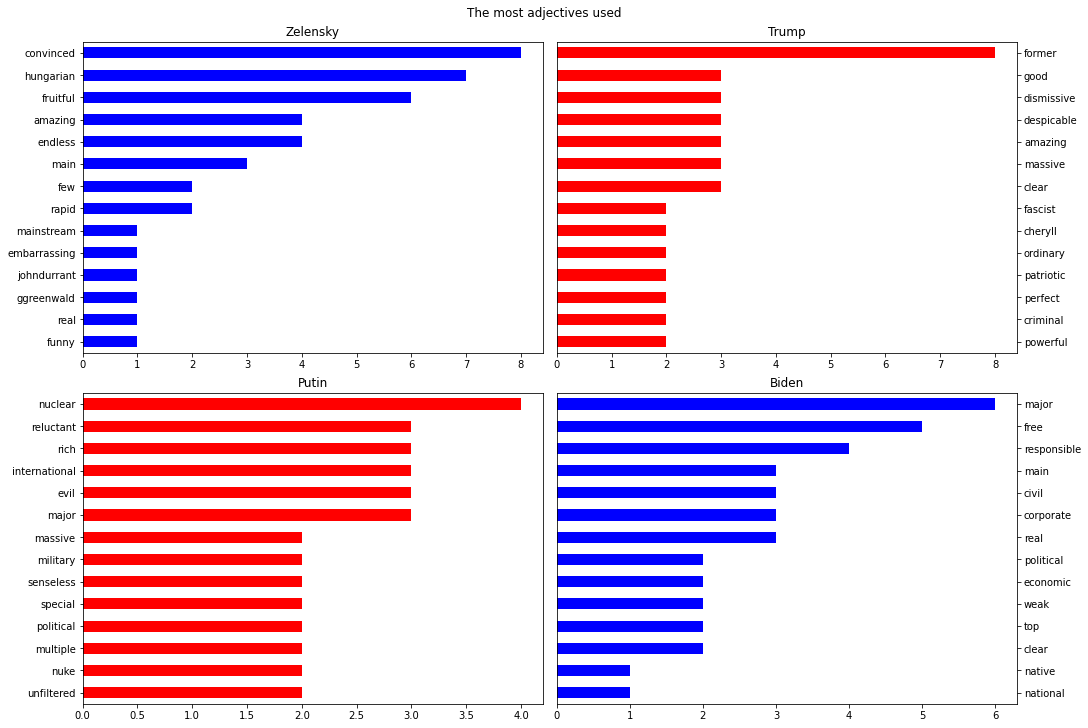

In [12]:
# Trump, Putin, Zelensky, Biden

fig, ax = plt.subplots(2,2,constrained_layout=True,figsize=(15, 10))
                
fig.suptitle('The most adjectives used')

nomes = ['Zelensky','Trump','Putin','Biden']

for i in range(len(ax)):
    for j in range(len(ax[i])):
        k = i*len(ax[i])+j
        ax_ij = ax[i,j]
        adj_4[k][14:0:-1].plot.barh(ax=ax_ij, color = 'blue' if nomes[k] == 'Zelensky' or nomes[k] == 'Biden' else 'red')
        ax_ij.get_legend().remove()
        ax_ij.set_ylabel('')
        ax_ij.set_title(nomes[k])

ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()

### Loading the STREAM results and printing the Flink latency and throughput

In [9]:
path = "../../../Results_Examples/STREAM_Results_Example/"

dados = []
tempo = 10
with open(path+str(1), 'r') as archive:
    lines = archive.readlines()
    for line in lines:
        # (Total,Number)
        dados.append([tempo,stringTuple2ToList(line.replace('\n',''))])
        tempo += 10

flink_metrics = pd.DataFrame(dados, columns=['Time','Counter'])
flink_metrics.set_index('Time',inplace=True)

In [10]:
flink_metrics['Throughput'] = flink_metrics['Counter']/10
flink_metrics['Latency'] = 10/flink_metrics['Counter']

Average Latency: 0.014538054985654301
Average Throughput: 69.01666666666667


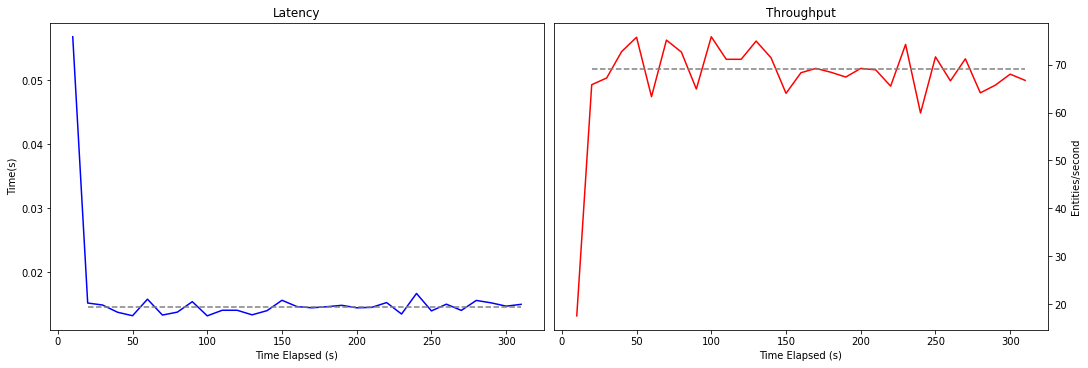

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2,constrained_layout=True,figsize=(15, 5))
                
flink_metrics.Latency.plot(ax=ax1, color = 'blue')
flink_metrics.Throughput.plot(ax=ax2, color = 'red')

leg = plt.legend()
#ax1.get_legend().remove()
ax2.get_legend().remove()
ax2.yaxis.tick_right()
ax1.set_ylabel('Time(s)')
ax2.set_ylabel('Entities/second')
ax1.set_xlabel('Time Elapsed (s)')
ax2.set_xlabel('Time Elapsed (s)')
ax1.set_title("Latency")
ax2.set_title("Throughput")
ax2.yaxis.set_label_position("right")

# It doesn't count the first element to calculate the average.
# The first element has a delay of loading the tools and creating the processes, so it can be ignored.
size_flink_metrics = (len(flink_metrics)-1)
latency_avg = flink_metrics.Latency[1:].sum()/size_flink_metrics
throughput_avg = flink_metrics.Throughput[1:].sum()/size_flink_metrics

print("Average Latency:", latency_avg)
print("Average Throughput:", throughput_avg)

ax1.plot(flink_metrics.index[1:],[latency_avg]*size_flink_metrics,'--',color="gray")
ax2.plot(flink_metrics.index[1:],[throughput_avg]*size_flink_metrics,'--',color="gray")